In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
titanic=pd.read_csv("./train.csv")

In [28]:
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [29]:
titanic["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

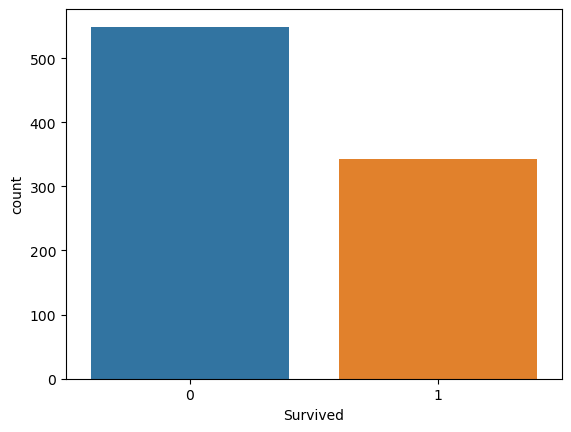

In [30]:
sns.countplot(data=titanic,x="Survived")

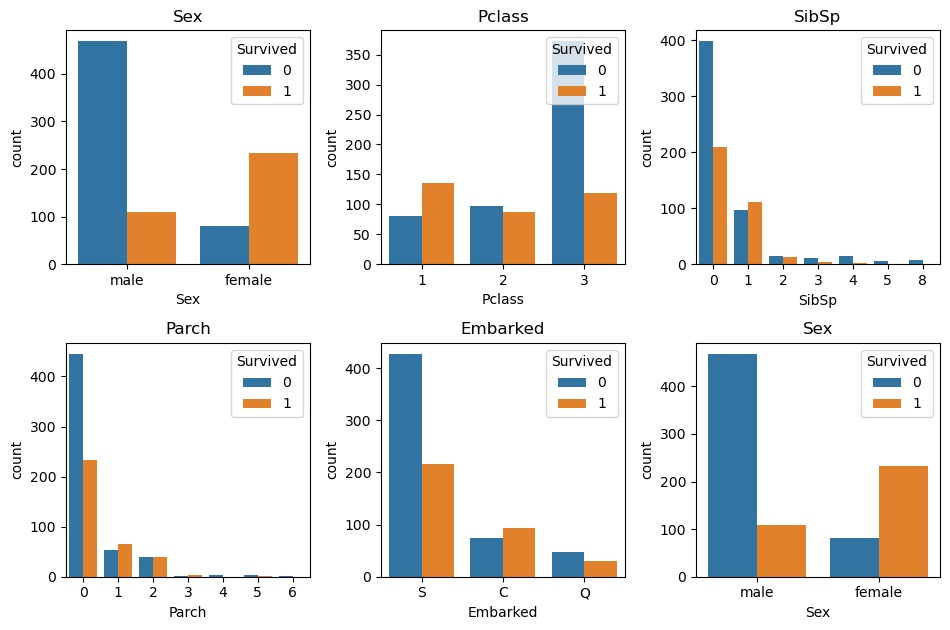

In [40]:
cols=["Sex","Pclass","SibSp","Parch","Embarked","Sex"]
n_rows=2
n_cols=3
fig,axs=plt.subplots(n_rows,n_cols,figsize=(n_cols*3.2,n_rows*3.2))
for r in range(0,n_rows):
    for c in range(0,n_cols):
        i=r*n_cols+c
        ax=axs[r][c]
        sns.countplot(x=titanic[cols[i]],hue=titanic["Survived"],ax=ax)
        ax.set_title(cols[i])
        ax.legend(title="Survived",loc="upper right")
plt.tight_layout()

In [44]:
titanic.pivot_table("Survived",index="Sex",columns="Pclass")

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


<AxesSubplot:xlabel='Sex'>

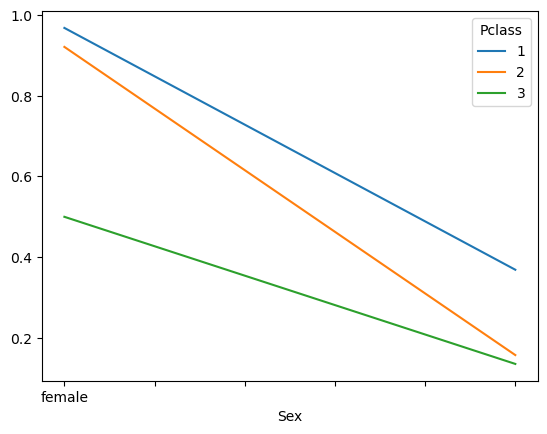

In [45]:
titanic.pivot_table("Survived",index="Sex",columns="Pclass").plot()

In [17]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

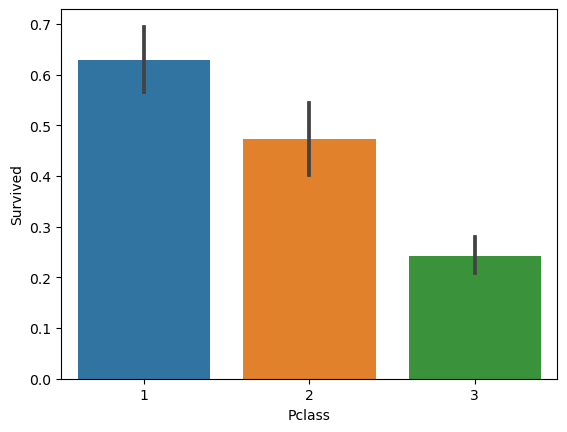

In [47]:
sns.barplot(x="Pclass",y="Survived",data=titanic)

In [59]:
age=pd.cut(titanic['Age'],[0,18,80])


In [60]:
titanic.pivot_table("Survived",["Sex",age],"Pclass")

Pclass                  1         2         3
Sex    Age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

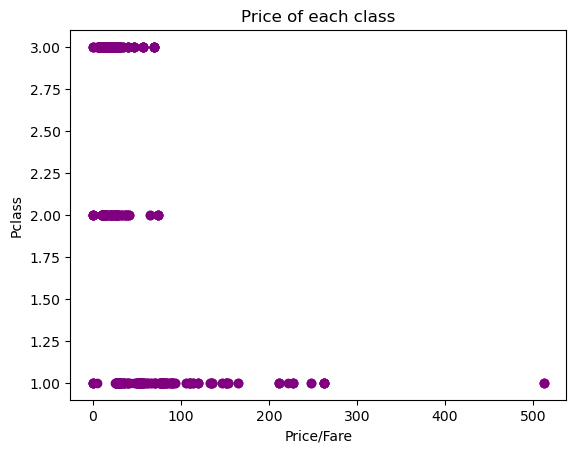

In [67]:
plt.scatter(titanic["Fare"],titanic["Pclass"],color="purple",label="Passenger Paid")
plt.ylabel("Pclass")
plt.xlabel("Price/Fare")
plt.title("Price of each class")
plt.show()

In [70]:
for val in titanic:
    print(titanic[val].value_counts())
    print()

1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: PassengerId, Length: 891, dtype: int64

0    549
1    342
Name: Survived, dtype: int64

3    491
1    216
2    184
Name: Pclass, dtype: int64

Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64

male      577
female    314
Name: Sex, dtype: int64

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88,

In [18]:
titanic["Age"].fillna(titanic["Age"].mean(),inplace=True)

In [19]:
titanic["Embarked"].mode()

0    S
Name: Embarked, dtype: object

In [20]:
titanic["Embarked"].fillna(titanic["Embarked"].mode()[0],inplace=True)

In [21]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [22]:
titanic.drop(columns="Cabin",axis=1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [23]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [24]:
print(titanic["Sex"].unique())
print(titanic["Embarked"].unique())

['male' 'female']
['S' 'C' 'Q']


In [25]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
titanic["Sex"]=labelencoder.fit_transform(titanic["Sex"].values)
titanic["Embarked"]=labelencoder.fit_transform(titanic["Embarked"].values)



In [14]:
X=titanic.drop(["Survived","Cabin","Name","Ticket","PassengerId","Fare"],axis=1)

In [15]:
X

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,1,22.000000,1,0,2
1,1,0,38.000000,1,0,0
2,3,0,26.000000,0,0,2
3,1,0,35.000000,1,0,2
4,3,1,35.000000,0,0,2
...,...,...,...,...,...,...
886,2,1,27.000000,0,0,2
887,1,0,19.000000,0,0,2
888,3,0,29.699118,1,2,2
889,1,1,26.000000,0,0,0


In [16]:
y=titanic.Survived
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,test_size=0.2,random_state=0)


In [18]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
def models(X_train,y_train):
    random= RandomForestClassifier(n_estimators=130,criterion="entropy",random_state=0)
    random.fit(X_train,y_train)
    
    log=LogisticRegression(random_state=0)
    log.fit(X_train,y_train)
    
    knn=KNeighborsClassifier(n_neighbors=5,metric="minkowski",p=2)
    knn.fit(X_train,y_train)
    
    svc=SVC(kernel="linear",random_state=0)
    svc.fit(X_train,y_train)
    
    svc_rbf=SVC(kernel="rbf",random_state=0)
    svc_rbf.fit(X_train,y_train)
    
    gauss=GaussianNB()
    gauss.fit(X_train,y_train)
    
    tree=DecisionTreeClassifier(criterion="entropy",random_state=0)
    tree.fit(X_train,y_train)
    print("[0]RandomForestClassifier Accuracy",random.score(X_train,y_train))
    print("[1]LogisticRegression Accuracy",log.score(X_train,y_train))
    print("[2KNeighborsClassifier Accuracy",knn.score(X_train,y_train))
    print("[3]SVC Accuracy",svc.score(X_train,y_train))
    print("[4]SVC-rbfAccuracy",svc_rbf.score(X_train,y_train))
    print("[5]GuassianNB Accuracy",gauss.score(X_train,y_train))
    print("[6]DecisionTreeClassifier Accuracy",tree.score(X_train,y_train))
    return random,log,knn,svc,svc_rbf,gauss,tree

In [20]:
model=models(X_train,y_train)

[0]RandomForestClassifier Accuracy 0.9410112359550562
[1]LogisticRegression Accuracy 0.8033707865168539
[2KNeighborsClassifier Accuracy 0.8637640449438202
[3]SVC Accuracy 0.7865168539325843
[4]SVC-rbfAccuracy 0.8384831460674157
[5]GuassianNB Accuracy 0.7907303370786517
[6]DecisionTreeClassifier Accuracy 0.9410112359550562


In [21]:
from sklearn.metrics import confusion_matrix
for i in range( len(model) ):
    cm=confusion_matrix(y_test,model[i].predict(X_test))
    TN,FP,FN,TP=confusion_matrix(y_test,model[i].predict(X_test)).ravel()
    test_scores=(TP+TN)/(TP+TN+FP+FN)
    print(cm)
    print('Model[{}] Testing Accuracy="{}"'.format(i,test_scores))
    print()
    

[[96 14]
 [19 50]]
Model[0] Testing Accuracy="0.8156424581005587"

[[95 15]
 [19 50]]
Model[1] Testing Accuracy="0.8100558659217877"

[[96 14]
 [24 45]]
Model[2] Testing Accuracy="0.7877094972067039"

[[92 18]
 [20 49]]
Model[3] Testing Accuracy="0.7877094972067039"

[[99 11]
 [22 47]]
Model[4] Testing Accuracy="0.8156424581005587"

[[90 20]
 [16 53]]
Model[5] Testing Accuracy="0.7988826815642458"

[[96 14]
 [23 46]]
Model[6] Testing Accuracy="0.7932960893854749"



In [22]:
forest=model[6]
importances=pd.DataFrame({"feature":X.columns,"importance":np.round(forest.feature_importances_,3)})
importances=importances.sort_values("importance",ascending=False).set_index("feature")
importances

,importance
feature,
Age,0.380
Sex,0.279
Pclass,0.129
SibSp,0.109
Parch,0.060
Embarked,0.044


<AxesSubplot:xlabel='feature'>

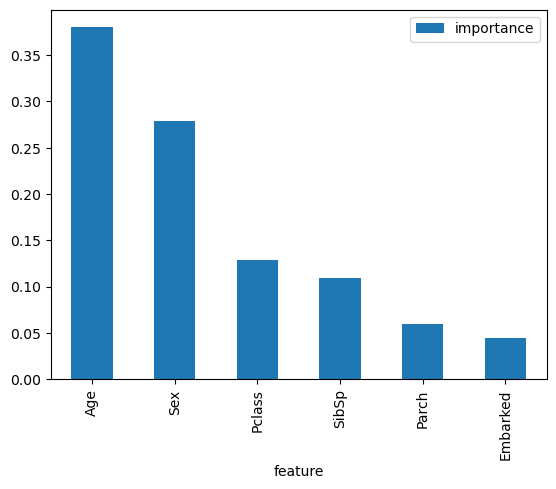

In [23]:
importances.plot.bar()